## Joining data from Google forms questionnaires.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

#### Let's get the data from the first survey:

In [2]:
columns = ['Datetime', 'ID', 'Course', 'Python_Experience', 'Favourite_Language']
df1 = pd.read_csv('Data Fusion.csv', names=columns, skiprows=1)

df1.set_index('ID', inplace=True)
df1.head()

,Datetime,Course,Python_Experience,Favourite_Language
ID,,,,
CJM,2020/02/18 4:31:48 PM GMT,EngMaths,8.0,Python
TLW,2020/02/18 4:32:38 PM GMT,ComSci,4.0,Java
MJM,2020/02/18 4:33:51 PM GMT,Digital Health,12.0,Python
Ludo12,2020/02/18 4:34:54 PM GMT,EngMaths,2.0,R
CJM,2020/02/18 10:35:04 PM GMT,EngMaths,7.0,LISP


In [3]:
len(df1)

46

In [4]:
df1.dtypes
#type(df1.Datetime[0])

Datetime               object
Course                 object
Python_Experience     float64
Favourite_Language     object
dtype: object

In [5]:
df1['Datetime'] = pd.to_datetime(df1['Datetime']) 

In [6]:
df1.index.is_unique

False

In [7]:
## if non-unique idex we can test inspect the duplicate indicies
indices = df1.groupby(level=0)

duplicate_indices = []

for index, gi in indices:
    if len(gi) > 1:
        print("Repeated index: ", index)
        duplicate_indices.append(gi)

Repeated index:  CJM


In [8]:
duplicate_indices[0]

,Datetime,Course,Python_Experience,Favourite_Language
ID,,,,
CJM,2020-02-18 16:31:48+00:00,EngMaths,8.0,Python
CJM,2020-02-18 22:35:04+00:00,EngMaths,7.0,LISP


In [9]:
df1 = df1.loc[~df1.index.duplicated(keep='first')]
print(df1.index.is_unique)
df1.head()

True


,Datetime,Course,Python_Experience,Favourite_Language
ID,,,,
CJM,2020-02-18 16:31:48+00:00,EngMaths,8.0,Python
TLW,2020-02-18 16:32:38+00:00,ComSci,4.0,Java
MJM,2020-02-18 16:33:51+00:00,Digital Health,12.0,Python
Ludo12,2020-02-18 16:34:54+00:00,EngMaths,2.0,R
yt15482,2020-02-19 08:57:45+00:00,Advanced Computing,1.0,Java


In [10]:
df1.index.is_unique

True

#### Now let's get the results from the second survey:

In [11]:
colums = ['Datetime', 'ID', 'Course', 'Ethics_Importance', 'Female_Developers', 'Favourite_Movie', 'Fusion_versus_Wrangling']

df2 = pd.read_csv('Data Fusion 2.csv', names=colums, skiprows=1)
df2.set_index('ID', inplace=True)
df2['Datetime'] = pd.to_datetime(df2['Datetime']) 
df2.head()

,Datetime,Course,Ethics_Importance,Female_Developers,Favourite_Movie,Fusion_versus_Wrangling
ID,,,,,,
CJM,2020-02-18 16:32:17+00:00,Engineering Mathematics,5,30.0,Big Lebowski,Wrangling
TLW,2020-02-18 16:33:19+00:00,ComSci,2,10.0,Cats,Fusion
MM,2020-02-18 16:34:29+00:00,Digital Health,4,50.0,One Flew Over The Cuckoo's Nest,Wrangling
Ludo12,2020-02-18 16:35:14+00:00,EngMaths,4,20.0,NaN,Fusion
yt15482,2020-02-19 08:59:58+00:00,Advanced Computing,5,30.0,Residence Evil,Fusion


In [12]:
df2.index.is_unique
## if not unique...as above

True

In [13]:
resultset1_ids = set(df1.index.unique()) 
resultset2_ids = set(df2.index.unique()) 

In [14]:
try:
    assert resultset1_ids == resultset2_ids
except AssertionError:
    print("Warning: ID columns do not match exactly.")

In [15]:
intersection = resultset1_ids.intersection(resultset2_ids)
difference = resultset1_ids.difference(resultset2_ids)

print(intersection)
print(difference)

{'Hugh Janus', '1979156', 'tu19072', '13257', 'ls16821', 'billnyethescienceguy', 'Bilbo', 'Monica', 'Hero', 'TLW', 'ZQ5436', 'un19409', 'Ludo12', 'sj16765', 'dr16639', '987654321', 'goatonmoon1965', '8008135', 'lj16141', 'pq19689', 'CJM', 'as16165', 'yt15482', 'kung fu panda', '123', 'web', 'S3kr3tSqu1rr3l99', 'zj19545', 'arw4', 'gg19687', 'si14458', 'oreOreo', '999333999', '266_nomad', 'gs15096', 'Mike', '1548404', 'cc16504', 'Adam_', 'X'}
{'MJM', 'gm19099', 'ccc', 'fz16336', '1763521'}


In [16]:
df2.loc[df2.index.isin(intersection)]

,Datetime,Course,Ethics_Importance,Female_Developers,Favourite_Movie,Fusion_versus_Wrangling
ID,,,,,,
CJM,2020-02-18 16:32:17+00:00,Engineering Mathematics,5,30.0,Big Lebowski,Wrangling
TLW,2020-02-18 16:33:19+00:00,ComSci,2,10.0,Cats,Fusion
Ludo12,2020-02-18 16:35:14+00:00,EngMaths,4,20.0,NaN,Fusion
yt15482,2020-02-19 08:59:58+00:00,Advanced Computing,5,30.0,Residence Evil,Fusion
pq19689,2020-02-19 09:00:30+00:00,Advanced Computing Data mining and high perfor...,5,30.0,avenger 4,Wrangling
web,2020-02-19 09:03:22+00:00,applied data science,4,40.0,2012,Fusion
13257,2020-02-19 09:09:37+00:00,Mathematics and Computer Science,5,40.0,Castle in the Sky,Wrangling
1979156,2020-02-19 09:12:40+00:00,Applied data science,5,30.0,The Professional,Fusion
S3kr3tSqu1rr3l99,2020-02-19 09:13:29+00:00,"MSc Advanced Computing (Machine Learning, Data...",5,20.0,Hackers,Wrangling


In [17]:
df1.loc[~df1.index.isin(intersection)].head()

,Datetime,Course,Python_Experience,Favourite_Language
ID,,,,
MJM,2020-02-18 16:33:51+00:00,Digital Health,12.0,Python
gm19099,2020-02-19 09:09:49+00:00,Applied Data Science,3.0,Python
1763521,2020-02-19 09:46:33+00:00,Machine Learning,3.0,Python
ccc,2020-02-19 10:24:42+00:00,data science,4.0,Java
fz16336,2020-02-20 23:06:16+00:00,Engineering Maths,3.0,Python


In [18]:
df2.loc[~df2.index.isin(intersection)].head()

,Datetime,Course,Ethics_Importance,Female_Developers,Favourite_Movie,Fusion_versus_Wrangling
ID,,,,,,
MM,2020-02-18 16:34:29+00:00,Digital Health,4,50.0,One Flew Over The Cuckoo's Nest,Wrangling


#### It seems there are four people who filled out the first form but not the second. And one person who used a different ID on the second form 'MM' instead of 'MJM'...So we can fix that discrepancy and then either omit the four respondess (by using outer join) or included them but with the data from the second form missing (by using inner join).

In [20]:
dodgy_ids = ['MM']
replacement_ids = ['MJM']

replace = lambda x: x if x not in dodgy_ids else replacement_ids[dodgy_ids.index(x)]

df1_corrected = df1.assign(NID = [replace(ii) for ii in df1.index]).set_index('NID')
df2_corrected = df2.assign(NID = [replace(ii) for ii in df2.index]).set_index('NID')

In [22]:
#df1.drop(columns=['NID'], inplace=True)
#df2_corrected = df2
#df1_corrected = df1

In [23]:
resultset1_ids = set(df1_corrected.index.unique()) 
resultset2_ids = set(df2_corrected.index.unique()) 

intersection = resultset1_ids.intersection(resultset2_ids)
difference = resultset1_ids.difference(resultset2_ids)

print(intersection)
print(difference)

{'Hugh Janus', '1979156', 'tu19072', '13257', 'ls16821', 'billnyethescienceguy', 'Bilbo', 'Monica', 'Hero', 'TLW', 'ZQ5436', 'un19409', 'Ludo12', 'sj16765', 'dr16639', '987654321', 'goatonmoon1965', '8008135', 'lj16141', 'pq19689', 'CJM', 'as16165', 'yt15482', 'MJM', 'kung fu panda', '123', 'web', 'S3kr3tSqu1rr3l99', 'zj19545', 'arw4', 'gg19687', 'si14458', 'oreOreo', '999333999', '266_nomad', 'gs15096', 'Mike', '1548404', 'cc16504', 'Adam_', 'X'}
{'ccc', '1763521', 'fz16336', 'gm19099'}


#### Before we join the two dataframes let's check out the duplicated Course column:

In [24]:
df1_corrected.Course.value_counts()

Computer Science                                                                         4
Engineering Maths                                                                        3
Applied data science                                                                     2
EngMaths                                                                                 2
applied data science                                                                     2
Machine Learning                                                                         2
Engineering mathematics                                                                  2
Applied Data Science                                                                     2
Engineering Mathematics                                                                  2
Advanced Computing machine learning data mining and high performance computing           1
ComSci                                                                                   1

In [25]:
df2_corrected.Course.value_counts()

Computer Science                                                                         4
Engineering Mathematics                                                                  3
Engineering Maths                                                                        2
applied data science                                                                     2
Applied data science                                                                     2
Engineering mathematics                                                                  1
MSc Engineering Mathematics                                                              1
Engineering Maths MSc                                                                    1
MEng Eng Maths                                                                           1
Applied Data Science                                                                     1
Advanced Computing                                                                       1

In [26]:
set(df1_corrected.Course.unique()) == set(df2_corrected.Course.unique())

False

We see the problem of inconsistent encoding of categorical variables that was disussed in the lecture! Fixing this would take some manual effort. A better solution would be to collect the data different (e.g. multiple choice), but we don't always have control over the data collection. 

#### Now that we have a nice clean index we can join the two dataframes: 

In [27]:
#df1_corrected.drop(columns=['Datetime'], inplace=True)
#df2_corrected.drop(columns=['Datetime', 'Course'], inplace=True)

#joined = df1_corrected.loc[df1_corrected.index.isin(intersection)].merge(df2_corrected.loc[df2_corrected.index.isin(intersection)], left_index=True, right_index=True)

joined = df1_corrected.merge(df2_corrected, left_index=True, right_index=True, how='outer')

In [28]:
joined.head()

,Datetime_x,Course_x,Python_Experience,Favourite_Language,Datetime_y,Course_y,Ethics_Importance,Female_Developers,Favourite_Movie,Fusion_versus_Wrangling
NID,,,,,,,,,,
123,2020-02-19 09:53:57+00:00,Advanced conputibg,3.5,Javaa,2020-02-19 09:55:14+00:00,advanced conputing,5.0,20.0,Home alone 2,Wrangling
13257,2020-02-19 09:04:03+00:00,Mathematics and Computer Science,8.0,Python,2020-02-19 09:09:37+00:00,Mathematics and Computer Science,5.0,40.0,Castle in the Sky,Wrangling
1548404,2020-02-19 09:59:56+00:00,Engineering Mathematics,2.0,Matlab,2020-02-19 09:58:38+00:00,Engineering Mathematics,5.0,10.0,Heat,Wrangling
1763521,2020-02-19 09:46:33+00:00,Machine Learning,3.0,Python,NaT,NaN,NaN,NaN,NaN,NaN
1979156,2020-02-19 09:09:39+00:00,Applied data science,3.0,Python,2020-02-19 09:12:40+00:00,Applied data science,5.0,30.0,The Professional,Fusion


In [32]:
## To see the rows with missing data because they did not fill in the second form:
joined.loc[~joined.index.isin(intersection)]

,Datetime_x,Course_x,Python_Experience,Favourite_Language,Datetime_y,Course_y,Ethics_Importance,Female_Developers,Favourite_Movie,Fusion_versus_Wrangling
NID,,,,,,,,,,
1763521,2020-02-19 09:46:33+00:00,Machine Learning,3.0,Python,NaT,NaN,NaN,NaN,NaN,NaN
ccc,2020-02-19 10:24:42+00:00,data science,4.0,Java,NaT,NaN,NaN,NaN,NaN,NaN
fz16336,2020-02-20 23:06:16+00:00,Engineering Maths,3.0,Python,NaT,NaN,NaN,NaN,NaN,NaN
gm19099,2020-02-19 09:09:49+00:00,Applied Data Science,3.0,Python,NaT,NaN,NaN,NaN,NaN,NaN


#### We need to deal with the duplication in the Course variable. We take the most recently input value of 'Course' (if not null).

In [33]:
joined.loc[joined.Course_x != joined.Course_y]

,Datetime_x,Course_x,Python_Experience,Favourite_Language,Datetime_y,Course_y,Ethics_Importance,Female_Developers,Favourite_Movie,Fusion_versus_Wrangling
NID,,,,,,,,,,
123,2020-02-19 09:53:57+00:00,Advanced conputibg,3.5,Javaa,2020-02-19 09:55:14+00:00,advanced conputing,5.0,20.0,Home alone 2,Wrangling
1763521,2020-02-19 09:46:33+00:00,Machine Learning,3.0,Python,NaT,NaN,NaN,NaN,NaN,NaN
CJM,2020-02-18 16:31:48+00:00,EngMaths,8.0,Python,2020-02-18 16:32:17+00:00,Engineering Mathematics,5.0,30.0,Big Lebowski,Wrangling
ZQ5436,2020-02-19 09:45:04+00:00,Computer Science,6.0,PHP,2020-02-19 09:45:54+00:00,Computer science,4.0,30.0,The matrix,Wrangling
ccc,2020-02-19 10:24:42+00:00,data science,4.0,Java,NaT,NaN,NaN,NaN,NaN,NaN
fz16336,2020-02-20 23:06:16+00:00,Engineering Maths,3.0,Python,NaT,NaN,NaN,NaN,NaN,NaN
gm19099,2020-02-19 09:09:49+00:00,Applied Data Science,3.0,Python,NaT,NaN,NaN,NaN,NaN,NaN
gs15096,2020-02-19 09:58:08+00:00,interactive AI CDT,4.0,Python,2020-02-19 09:59:12+00:00,Interactive AI CDT,4.0,30.0,Interstellar,Wrangling
ls16821,2020-02-19 09:45:27+00:00,Engineering mathematics,3.0,Python,2020-02-19 09:46:41+00:00,Engineering mathemtics,5.0,30.0,Big fish,Wrangling


In [36]:
most_recent = lambda row: row.Course_x if ((row.Datetime_x > row.Datetime_y) & (pd.notnull(row.Course_x))) else row.Course_y
joined = joined.assign(Course = [ci if ci==cj else most_recent(joined.iloc[ii]) for ii, (ci,cj) in enumerate(zip(joined.Course_x, joined.Course_y))]) 

joined.drop(columns=['Course_x', 'Course_y'], inplace=True)
joined.head()

,Datetime_x,Python_Experience,Favourite_Language,Datetime_y,Ethics_Importance,Female_Developers,Favourite_Movie,Fusion_versus_Wrangling,Course
NID,,,,,,,,,
123,2020-02-19 09:53:57+00:00,3.5,Javaa,2020-02-19 09:55:14+00:00,5.0,20.0,Home alone 2,Wrangling,advanced conputing
13257,2020-02-19 09:04:03+00:00,8.0,Python,2020-02-19 09:09:37+00:00,5.0,40.0,Castle in the Sky,Wrangling,Mathematics and Computer Science
1548404,2020-02-19 09:59:56+00:00,2.0,Matlab,2020-02-19 09:58:38+00:00,5.0,10.0,Heat,Wrangling,Engineering Mathematics
1763521,2020-02-19 09:46:33+00:00,3.0,Python,NaT,NaN,NaN,NaN,NaN,NaN
1979156,2020-02-19 09:09:39+00:00,3.0,Python,2020-02-19 09:12:40+00:00,5.0,30.0,The Professional,Fusion,Applied data science


In [37]:
joined.Course.value_counts()

Computer Science                                                                         4
Engineering Mathematics                                                                  3
Engineering Maths                                                                        2
applied data science                                                                     2
Applied data science                                                                     2
Engineering mathematics                                                                  1
MSc Engineering Mathematics                                                              1
Engineering Maths MSc                                                                    1
Maths and computer science                                                               1
Applied Data Science                                                                     1
Advanced Computing                                                                       1

#### Now that the data sets are fused we can interogate them and continue the exploration...

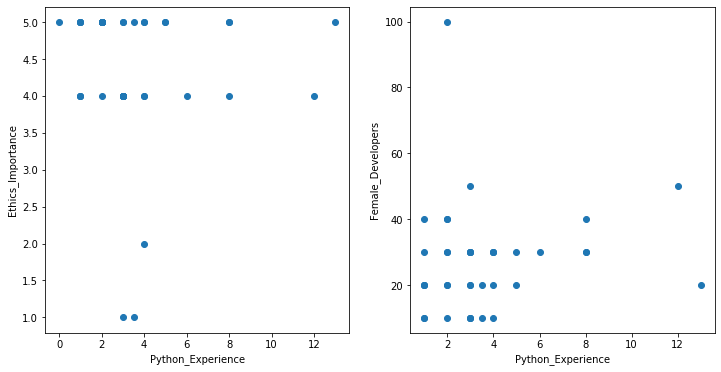

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(joined.Python_Experience, joined.Ethics_Importance)
plt.xlabel('Python_Experience')
plt.ylabel('Ethics_Importance');

plt.subplot(1,2,2)
plt.scatter(joined.Python_Experience, joined.Female_Developers)
plt.xlabel('Python_Experience')
plt.ylabel('Female_Developers');

In [39]:
joined.Favourite_Language.value_counts()

Python        24
Java           6
Matlab         5
R              1
Javaa          1
PHP            1
Julia          1
LISP           1
C++            1
C              1
JavaScript     1
Scala          1
Ruby           1
Name: Favourite_Language, dtype: int64

In [40]:
joined.Favourite_Movie.value_counts()

Goat On Moon                                              1
Dark knight                                               1
2012                                                      1
Shawshank                                                 1
Inception                                                 1
Harry potter                                              1
Harry Potter: Order of the Pheonix                        1
One Flew Over The Cuckoo's Nest                           1
Eyes wide shut                                            1
Castle in the Sky                                         1
Weathering with you                                       1
Big fish                                                  1
Reservoir dogs                                            1
princess mononoke                                         1
Big Lebowski                                              1
Pirates of the Caribbean: The curse of the black pearl    1
Forrest Gump                            

There are 33 courses.


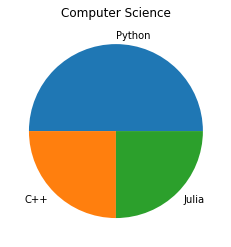

In [48]:
gi = 6
groups = list(joined.groupby('Course'))

print("There are %d courses." %len(groups))
      
plt.title(groups[gi][0])
groups[gi][1].Favourite_Language.value_counts().plot.pie()
plt.axis('off');

In [49]:
joined.loc[joined['Course'] == 'Digital Health']
#joined[joined[['Course']] == 'Digital Health']#[['Favourite_Movie']]

,Datetime_x,Python_Experience,Favourite_Language,Datetime_y,Ethics_Importance,Female_Developers,Favourite_Movie,Fusion_versus_Wrangling,Course
NID,,,,,,,,,
MJM,2020-02-18 16:33:51+00:00,12.0,Python,2020-02-18 16:34:29+00:00,4.0,50.0,One Flew Over The Cuckoo's Nest,Wrangling,Digital Health


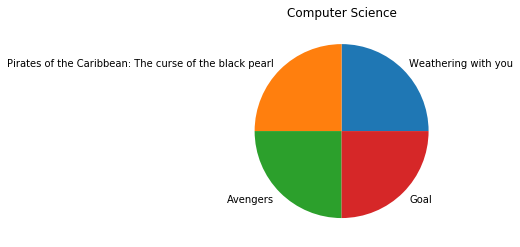

In [51]:
def plot_movie_pie(group_on='Course', gi='Computer Science'):
    
    plt.title(gi)
    joined.loc[joined[group_on] == gi, 'Favourite_Movie'].value_counts().plot.pie()
    plt.axis('off');

plot_movie_pie() #gi='Engineering Mathematics')

#### Other ideas to try:

    * Can you predict Fusion_versus_Wrangling from the other features? (if so, which features are predictive?)
    * Can you predict Python_Experience from the other features?
    * What insightful visualisations can you produce?